# INTRODUCTION

There are given two datasets. 

One of them is "clicked items investigation" and the other one is "session investigation".

First of all, i should write my methodology and solution approach.

I follow five instruction to solve data science problems:

    - Define the problem

    - Prepare Data / Data Preprocessing
        Get Data
        Data Cleaning/Wrangling
        Statistical Analysis
        Data Visualization
        Feature Selection/Scaling
        Data Transformation

    - Check Algorithms
        Train & Test Data
        Apply ML Algorithm
        Test
        Perform Measure
        Evaulate accuarcy of different algorithm

    - Improve Results
        Algorithm Tuning

    - Present Results
        Conclusion
        Presentation

## DEFINITION THE PROBLEM

We have some information about the items(hotels) and we will try to solve questions using data_analysis_case_study_part1.csv and data_analysis_case_study_part2.csv datasets.

The aim is to analyze customer click-out behaivour. On the other hand, one of the most important point is click through rates. These informations helps us to evaulate the hotel performance, provide insight for ranking, in addition to that we can predict other hotels might be interesting for the end users. 

### 1-CLICKED ITEM INVESTIGATION

For this section we will try to find answer following questions the below.

    1-Calculate the CTR of each item. What is the overall avg CTR?

    2-What is the distribution of clicks among the top 25 positions? What is the share of the first positions? On how many positions are approx. Half of the click-outs made?

    3-Describe the relationship between the average displayed position and the clicked displayed position. What are your thoughts about the variance between the two?

    4-In the dataset, we provided you with the average displayed position. What can be wrong with using averages?

So let's start data analysis...

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as m
import scipy.stats as sct
#from scipy import stats as st

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()

In [2]:
# Log
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='data_analyst_search.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

###### 1-Calculate the CTR of each item. What is the overall avg CTR?

In [3]:
# Get data
file = 'data_analysis_case_study_part1.csv'
data = pd.read_csv(file)

data.head(5)
data.shape

logging.debug('data received...')

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions
0,5040,40,5,20;9;12;10;12,11.83,22,23
1,5053,83,3,2;3;0,7.88,43,52
2,5094,54,6,0;0;0;2;1;2,4.72,30,36
3,5101,30,2,5;3,4.97,17,20
4,5105,24,1,18,9.08,8,11


(130056, 7)

In [4]:
# Data types and size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130056 entries, 0 to 130055
Data columns (total 7 columns):
item_id                        130056 non-null int64
impressions                    130056 non-null int64
clicks                         130056 non-null int64
clicked_displayed_positions    130056 non-null object
avg_impressed_position         130056 non-null float64
num_users                      130056 non-null int64
num_sessions                   130056 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.9+ MB


In [5]:
# check negative values; if it is exist, update or ignore these values

#data['impressions']  = np.where((data['impressions']  < 0), 0, data['impressions'])

neg_imp = set(data.loc[data.impressions < 0, 'impressions'])
neg_cli = set(data.loc[data.clicks < 0, 'clicks'])
neg_avg = set(data.loc[data.avg_impressed_position < 0, 'avg_impressed_position'])
neg_user = set(data.loc[data.num_users < 0, 'num_users'])
neg_sess = set(data.loc[data.num_sessions < 0, 'num_sessions'])

print("impression              : ", neg_imp)
print("clicks                  : ", neg_cli)
print("avg_impressed_position  : ", neg_avg)
print("num_users               : ", neg_user)
print("num_sessions            : ", neg_sess)

logging.debug('check negative values')

impression              :  set()
clicks                  :  set()
avg_impressed_position  :  set()
num_users               :  set()
num_sessions            :  set()


In [6]:
# check null values
check_null_columns = data.isnull().sum()
print('**************************')
print('Check Null Values Column by Column')
print(check_null_columns)
print('count of null values          ', data.isnull().values.sum())
print('**************************')

logging.debug('check null values')

**************************
Check Null Values Column by Column
item_id                        0
impressions                    0
clicks                         0
clicked_displayed_positions    0
avg_impressed_position         0
num_users                      0
num_sessions                   0
dtype: int64
count of null values           0
**************************


In [7]:
# check unique hotel id
data[data.duplicated(subset=['item_id'],keep=False)]

logging.debug('check unique hotel')

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions


In [8]:
# some statistical information
data.describe()

,item_id,impressions,clicks,avg_impressed_position,num_users,num_sessions
count,1.300560e+05,130056.000000,130056.000000,130056.000000,130056.000000,130056.000000
mean,1.975953e+06,278.031648,12.897452,11.223035,167.495417,185.832072
std,1.879174e+06,830.236049,52.592582,4.086324,493.278475,556.626846
min,5.001000e+03,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.501388e+05,15.000000,1.000000,8.860000,8.000000,9.000000
50%,1.433822e+06,55.000000,2.000000,11.750000,32.000000,35.000000
75%,3.135273e+06,205.000000,7.000000,14.030000,122.000000,134.000000
max,7.174984e+06,38569.000000,2865.000000,24.000000,22576.000000,25987.000000


###### CTR of each item and overall avg CTR?

In [9]:
# CTR
# overall CTR

data['CTR'] = (data.clicks)/(data.impressions)
data['CTR_overall'] = sum(data.clicks)/sum(data.impressions)

data.head(5)

logging.debug('CTR and overall CTR')

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions,CTR,CTR_overall
0,5040,40,5,20;9;12;10;12,11.83,22,23,0.125000,0.046388
1,5053,83,3,2;3;0,7.88,43,52,0.036145,0.046388
2,5094,54,6,0;0;0;2;1;2,4.72,30,36,0.111111,0.046388
3,5101,30,2,5;3,4.97,17,20,0.066667,0.046388
4,5105,24,1,18,9.08,8,11,0.041667,0.046388


###### 2-What is the distribution of clicks among the top 25 positions? What is the share of the first positions? On how many positions are approx. Half of the click-outs made?

In [10]:
# convert from semicolon to list
clicked_distribution = pd.Series(data.clicked_displayed_positions.str.cat(sep=';').split(';')).value_counts()
clicked_distribution

logging.debug('parsing semicolon data')

0      480309
1      189940
-11    134286
2      126803
3       97318
4       78927
5       66361
6       57307
7       49121
8       43563
9       39756
10      35134
11      31630
12      29395
13      25782
14      23677
15      22706
16      20243
17      19109
18      17635
19      16141
24      15823
20      15137
21      14596
22      13452
23      13240
dtype: int64

In [11]:
# we expect that the positions should be between 0 and 24. 
# so we need to remove -11 position, because this data is not valid for our analysis.
clicked_distribution = clicked_distribution.drop(labels=['-11'])
clicked_distribution

logging.debug('cleaning the unexpected positions')

0     480309
1     189940
2     126803
3      97318
4      78927
5      66361
6      57307
7      49121
8      43563
9      39756
10     35134
11     31630
12     29395
13     25782
14     23677
15     22706
16     20243
17     19109
18     17635
19     16141
24     15823
20     15137
21     14596
22     13452
23     13240
dtype: int64

###### What is the share of the first positions?

 
 
please find distribution of clicks from the pie chart below!


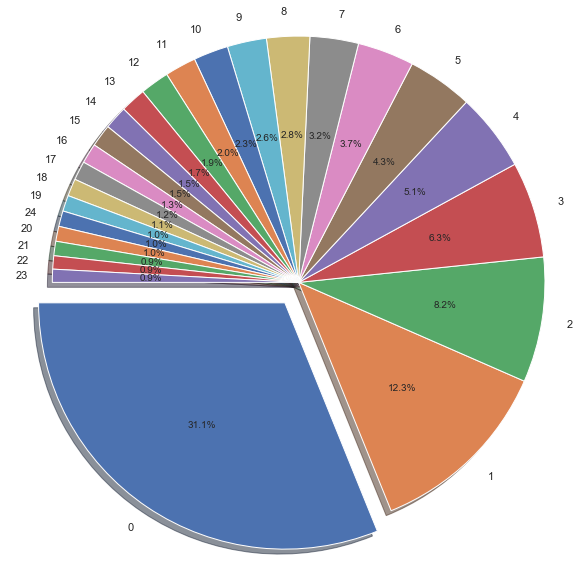

In [12]:
# distribution of clicks
print(" ")
print(" ")
print ('please find distribution of clicks from the pie chart below!')

labels = clicked_distribution.index
sizes = clicked_distribution.values
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(10, 10))
_=plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
_=plt.axis('equal')
plt.show();

logging.debug('distribution of positions')

###### On how many positions are approx. Half of the click-outs made?

In [13]:
# share of the first position
# half of the click-outs made

print ('share of the first position     : ', '% 31.1')
print ('half of the click-outs made     : ', 'First three positions= 0,1,2')

share of the first position     :  % 31.1
half of the click-outs made     :  First three positions= 0,1,2


###### 3-Describe the relationship between the average displayed position and the clicked displayed position. What are your thoughts about the variance between the two?


In [14]:
# thanks to some range setting assumption, we can find total clicks according to average displayed position.
    
    # 0.0-0.5 = 0 position
    # 0.5-1.5 = 1 position
    # 1.5-2.5 = 2 position 
    # ...
    # 22.5-23.5 = 23 position
    # 23.5-24.0 = 24 position

impressed_distribution = pd.Series(data['clicks'][data['avg_impressed_position'] <= 0.5].sum())

for i in range(1,24,1):
    impressed_distribution = impressed_distribution.append(pd.Series(data['clicks'][((data['avg_impressed_position'] >= (i-0.5)) & 
                                                                            (data['avg_impressed_position'] <= (i+0.5)))].sum()), 
                                                  ignore_index=True)
    
impressed_distribution = impressed_distribution.append(pd.Series(data['clicks'][data['avg_impressed_position'] >= 23.5].sum()), 
                                               ignore_index=True)
impressed_distribution

0       3335
1       5830
2      18224
3      38640
4      57204
5      82751
6     107551
7     121024
8     131325
9     147619
10    175963
11    196702
12    183697
13    166501
14    119803
15     75927
16     36983
17     17160
18      5672
19      2282
20       819
21       404
22       200
23       113
24        78
dtype: int64

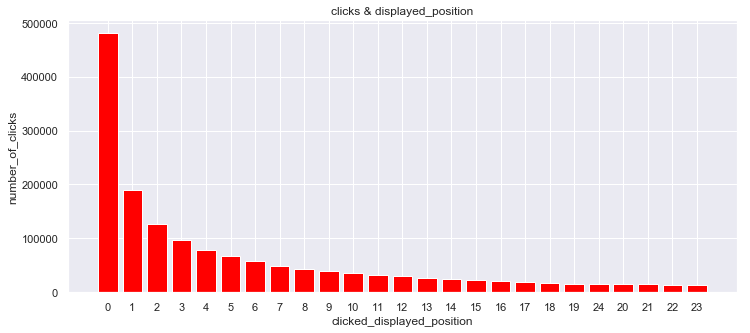

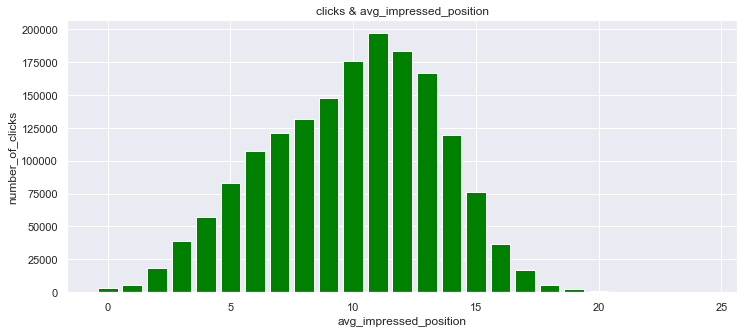

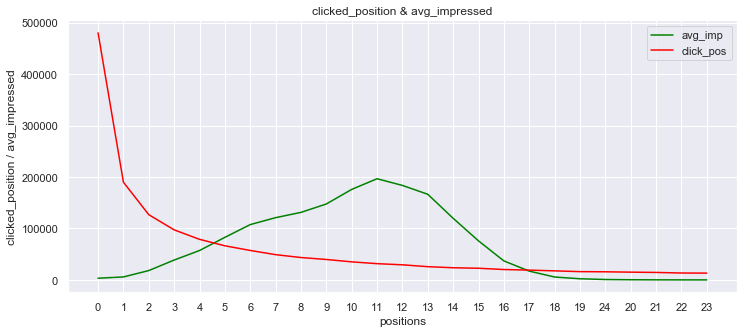

In [15]:
# number of clicks vs clicked displayed position
fig = plt.figure(figsize=(12,5))
_=plt.bar(clicked_distribution.index, clicked_distribution.values, color='red')
_=plt.xlabel('clicked_displayed_position')
_=plt.ylabel('number_of_clicks')
_=plt.title('clicks' + ' & displayed_position')
plt.show();

logging.debug('clicks & avg impressed position')


# avg impressions vs clicks
fig = plt.figure(figsize=(12,5))
_=plt.bar(impressed_distribution.index, impressed_distribution.values, color='green')
_=plt.xlabel('avg_impressed_position')
_=plt.ylabel('number_of_clicks')
_=plt.title('clicks' + ' & avg_impressed_position')
plt.show();

logging.debug('clicks & displayed position')


# step one- Describe the relationship between the avg_impressed_position and the clicked displayed position.
fig = plt.figure(figsize=(12,5))
p1, = plt.plot(impressed_distribution.index, impressed_distribution.values, color='green')
p2, = plt.plot(clicked_distribution.index, clicked_distribution.values, color='red')
_=plt.legend([p1, p2], ['avg_imp','click_pos'], loc='best')
_=plt.xlabel('positions')
_=plt.ylabel('clicked_position / avg_impressed')
_=plt.title('clicked_position & avg_impressed')
plt.show();

logging.debug('clicked position & avg impressed position')




*********************
correlation table


,avg_impressed,clicked_displayed
0,3335,480309
1,5830,189940
2,18224,126803
3,38640,97318
4,57204,78927





*********************
correlation coefficient


,avg_impressed,clicked_displayed
avg_impressed,1.00000,-0.21347
clicked_displayed,-0.21347,1.00000


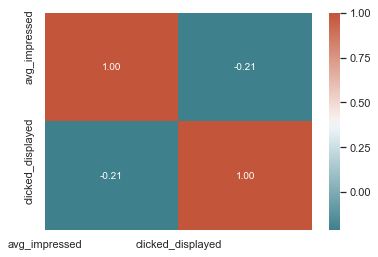

In [16]:
# step two- Describe the relationship between the avg_impressed_position and the clicked displayed position.

impressed_distribution.index = impressed_distribution.index.astype(int)
impressed_distribution.sort_index(inplace=True)

clicked_distribution.index = clicked_distribution.index.astype(int)
clicked_distribution.sort_index(inplace=True)

corr_map = {'avg_impressed' : impressed_distribution, 'clicked_displayed' : clicked_distribution}
corr_df = pd.DataFrame(corr_map)

pd.set_option('precision', 5)
correlations = corr_df.corr(method='pearson')

print('')
print('')
print('')
print('*********************')
print('correlation table')
corr_df.head(5)

print('')
print('')
print('')
print('*********************')
print('correlation coefficient')
correlations

print('')
print('')
print('')
colormap = sns.diverging_palette(210, 20, as_cmap=True)
_=sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
_=plt.xticks(range(len(correlations.columns)), correlations.columns)
_=plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.show();

logging.debug('correlation')

###### What are your thoughts about the variance between the two?

This analysis shows us clearly that there is not any direct relationship between "impressions" and "clicks".

Moreover, we can say that if you would like to increase the number of clicks you should stay in the first 3 positions on the list.

On the other hand, one of the important value is the impression. 
But impression says that your position should be between 6 and 14 for many clicks.

As a result, we should think together, both clicked position and avg impressed position.

Your position can be at a different location on the list, but in general, it is in the first 3 positions when the hotel is clicked by users.

Your position depends on some filters or searches criteria.

In this time, your click chance is decreasing because of your avg impressed position calculating.

The last one, you should focus your "currently position" not "average impressed position". 

Because you can slip down on the list and your avg impressed position can be changed, but it is normal and not vital.

###### 4-In the dataset, we provided you with the average displayed position. What can be wrong with using averages?

 One of the most important questions that are how and why to calculate the avg result.

 We analyzed avg output the above and this information is not helpful for the next step.

 Because each customer wants to choose different features and filters.

 Then sometimes your position drops behind because of ranking or filters, but this not mean you will not be selected by the customers.
 
 Your "avg impressed position" can be increased because of all these factors. But when you are placed near the top, your click possibility can increase and not affects from avg impressed position.

### 2-SESSION INVESTIGATION

For this section we will try to find answer following questions the below.

    1-Describe the data set that you have received. Calculate the 5 most frequent values per column (with frequency). Can you find any suspicious results? If so, what are they? And how would you fix these for the analysis?

    2-Which search type has the lowest average displayed position? What is the best sorting order for this search type? Which search type should be excluded for a statistical reason?

    3-What are the top 10 “best” and “worst” performing items? Explain what metric you have chosen to evaluate the performance and why.

    4-Describe and visualise the relationship between the average displayed position and the CTR among the top 1000 most clicked items.
    
So let's start data analysis...

###### 1-Describe the data set that you have received. Calculate the 5 most frequent values per column (with frequency). Can you find any suspicious results? If so, what are they? And how would you fix these for the analysis?

In [17]:
# Get data
file2 = 'data_analysis_case_study_part2.csv'
big_data = pd.read_csv(file2, low_memory=False)

big_data.head(5)
big_data.shape

logging.debug('big data received...')

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
0,6216730024127027591,3.75563e+18,3390592.0,-11.0,0.0,12.0,2113.0,39693.0,3.0,4.0,2.0,128992;127920;132177;1107164;19389;3217646;123...
1,3540322805835307689,4.58141e+18,2393900.0,6.0,0.0,21.0,2113.0,35009.0,21.0,22.0,2.0,5169438;997421;76994;1376364;67654;68977;23939...
2,5439210126639293380,7.26024e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
3,3482625725900275142,3.01304e+18,148308.0,6.0,0.0,41.0,2113.0,41579.0,39.0,42.0,3.0,2196706;46431;1262783;148312;1478421;6171546;1...
4,6185636196804664137,1.46358e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...


(1903796, 12)

In [18]:
# Data types and size
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903796 entries, 0 to 1903795
Data columns (total 12 columns):
user_id                object
session_id             float64
clicked_item_id        float64
displayed_position     float64
page_num               float64
sort_order             float64
search_type            float64
path_id                float64
arrival_days           float64
departure_days         float64
traffic_type           float64
impressed_item_ids     object
dtypes: float64(10), object(2)
memory usage: 174.3+ MB


In [19]:
# some statistical informations
big_data.describe()

,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type
count,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06,1.90380e+06
mean,4.59932e+18,1.15133e+06,4.25573e+00,2.71092e-01,1.03114e+02,2.11365e+03,8.22404e+04,5.74145e+01,-2.75336e+04,2.10314e+00
std,2.66287e+18,1.48724e+06,7.72473e+00,1.09741e+00,1.34258e+02,1.53055e+00,1.24144e+05,7.03460e+01,1.63811e+05,4.50813e-01
min,4.36893e+12,5.00100e+03,-1.10000e+01,0.00000e+00,0.00000e+00,2.10000e+03,0.00000e+00,-1.00000e+00,-1.00000e+06,1.00000e+00
25%,2.29485e+18,4.70800e+04,0.00000e+00,0.00000e+00,1.20000e+01,2.11300e+03,3.80090e+04,9.00000e+00,1.00000e+01,2.00000e+00
50%,4.59367e+18,4.81016e+05,2.00000e+00,0.00000e+00,1.20000e+01,2.11300e+03,4.06060e+04,2.70000e+01,2.70000e+01,2.00000e+00
75%,6.90545e+18,1.82289e+06,8.00000e+00,0.00000e+00,2.12000e+02,2.11500e+03,4.68140e+04,8.40000e+01,8.50000e+01,2.00000e+00
max,9.22337e+18,7.17498e+06,2.40000e+01,2.00000e+01,4.21000e+02,2.11600e+03,6.80424e+05,7.30000e+02,7.42000e+02,3.00000e+00


In [20]:
# check null values
check_null_columns_2 = big_data.isnull().sum()
print('**************************')
print('Check Null Values Column by Column')
print(check_null_columns_2)
print('**************************')
print('count of null values          ', big_data.isnull().values.sum())
print('**************************')

logging.debug('check null values')

**************************
Check Null Values Column by Column
user_id                0
session_id             1
clicked_item_id        1
displayed_position     1
page_num               1
sort_order             1
search_type            1
path_id                1
arrival_days           1
departure_days         1
traffic_type           1
impressed_item_ids     1
dtype: int64
**************************
count of null values           11
**************************


In [21]:
# delete null values
print('**************************')
print('before :')
big_data[big_data['session_id'].isnull()]
big_data = big_data.drop([1903795])
print("")
print('**************************')
print('after :')
big_data[big_data['session_id'].isnull()]

logging.debug('remove null values')

**************************
before :


,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
1903795,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**************************
after :


,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids


In [22]:
# check negative values; if it is exist, update or ignore these values

#data['sess_id']  = np.where((data['sess_id']  < 0), 0, data['sess_id'])

neg_sess_id    = set(big_data.loc[big_data.session_id < 0, 'session_id'])
neg_clic_it_id = set(big_data.loc[big_data.clicked_item_id < 0, 'clicked_item_id'])
neg_disp_pos   = set(big_data.loc[big_data.displayed_position < 0, 'displayed_position'])
neg_pg_num     = set(big_data.loc[big_data.page_num < 0, 'page_num'])
neg_srt_ord    = set(big_data.loc[big_data.sort_order < 0, 'sort_order'])
neg_src_type   = set(big_data.loc[big_data.search_type < 0, 'search_type'])
neg_pth_id     = set(big_data.loc[big_data.path_id < 0, 'path_id'])
neg_arr_days   = set(big_data.loc[big_data.arrival_days < 0, 'arrival_days'])
neg_dpt_days   = set(big_data.loc[big_data.departure_days < 0, 'departure_days'])
neg_trf_typ    = set(big_data.loc[big_data.traffic_type < 0, 'traffic_type'])

print("session_id              : ", neg_sess_id)
print("clicked_item_id         : ", neg_clic_it_id)
print("displayed_position      : ", neg_disp_pos)
print("page_num                : ", neg_pg_num)
print("sort_order              : ", neg_srt_ord)
print("search_type             : ", neg_src_type)
print("path_id                 : ", neg_pth_id)
print("arrival_days            : ", neg_arr_days)
print("departure_days          : ", neg_dpt_days)
print("traffic_type            : ", neg_trf_typ)
print("************************")
print("")
big_data[((big_data['displayed_position'] < 0) | (big_data['displayed_position'] > 24)) & (big_data['displayed_position'] != -11)]

logging.debug('check negative values')

session_id              :  set()
clicked_item_id         :  set()
displayed_position      :  {-11.0}
page_num                :  set()
sort_order              :  set()
search_type             :  set()
path_id                 :  set()
arrival_days            :  {-1.0}
departure_days          :  {-1000000.0}
traffic_type            :  set()
************************



,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids


###### Calculate the 5 most frequent values per column (with frequency)

In [23]:
# Calculate the 5 most frequent values per column (with frequency)

big_data.user_id = big_data.user_id.astype(float)

impressed_item_ids_distr = pd.Series(big_data["impressed_item_ids "].str.cat(sep=';').split(';')).value_counts()
impressed_item_ids_distr.index = impressed_item_ids_distr.index.astype(int)

for c in big_data.columns:
    if c == "impressed_item_ids ":
        continue    
    print('*********************')
    print(c)
    big_data[c].value_counts().nlargest(5)
    
print('*********************')
print('impressed_item_ids ')
impressed_item_ids_distr.head(5)

logging.debug('frequency analysis')

*********************
user_id


4.50987e+18    549
3.21253e+18    374
9.05153e+18    335
8.84443e+18    272
6.29740e+18    219
Name: user_id, dtype: int64

*********************
session_id


5.00907e+18    337
8.56057e+18    148
2.83995e+18    109
7.15474e+18     92
3.19122e+18     88
Name: session_id, dtype: int64

*********************
clicked_item_id


2834772.0    2869
1321090.0    2828
12624.0      2575
32940.0      2324
1455251.0    2297
Name: clicked_item_id, dtype: int64

*********************
displayed_position


 0.0     495014
 1.0     203090
-11.0    152437
 2.0     138789
 3.0     108490
Name: displayed_position, dtype: int64

*********************
page_num


0.0    1677391
1.0     124109
2.0      44578
3.0      21226
4.0      11857
Name: page_num, dtype: int64

*********************
sort_order


12.0     1162269
312.0     283516
212.0     229803
412.0      94343
41.0       54259
Name: sort_order, dtype: int64

*********************
search_type


2113.0    928598
2116.0    375583
2111.0    230316
2115.0    194310
2114.0    174986
Name: search_type, dtype: int64

*********************
path_id


38715.0    138706
46814.0     41379
41579.0     36498
38961.0     31634
31965.0     30928
Name: path_id, dtype: int64

*********************
arrival_days


0.0    65863
3.0    63180
1.0    60910
4.0    54871
5.0    50279
Name: arrival_days, dtype: int64

*********************
departure_days


 4.0          59506
 1.0          52780
-1000000.0    52530
 5.0          51982
 6.0          48879
Name: departure_days, dtype: int64

*********************
traffic_type


2.0    1496629
3.0     301763
1.0     105403
Name: traffic_type, dtype: int64

*********************
impressed_item_ids 


1321090    40142
47121      29460
12594      21297
3218556    20701
880913     20554
dtype: int64

###### Can you find any suspicious results? If so, what are they? And how would you fix these for the analysis?

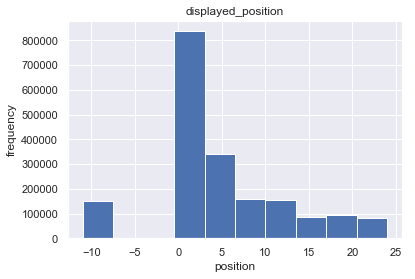

In [24]:
# displayed_position should be in between 0 and 24, so -11 is incorrect, 
# market share should be updated.
# we have enough data for analysis and -11 position data is not big, so no big affect to our analysis.

# On the other way if you want to use -11 position data, you need to find a pattern for each position.
# after that, you should change -11 position data with the most matched pattern values.

_=plt.hist(big_data.displayed_position)
_=plt.title("displayed_position")
_=plt.xlabel("position")
_=plt.ylabel("frequency")
plt.show();

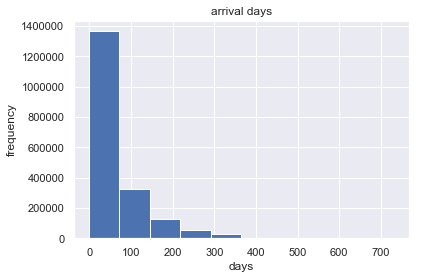

In [25]:
# min arrival_days should be 0, the negative values are meaningless. 
# -1 value frequency is very small into the arrival_days column.
# Then it does not affect our analysis and I can ignore and also I don't need to use it for analysis.

_=plt.hist(big_data.arrival_days)
_=plt.title("arrival days")
_=plt.xlabel("days")
_=plt.ylabel("frequency")
plt.show();

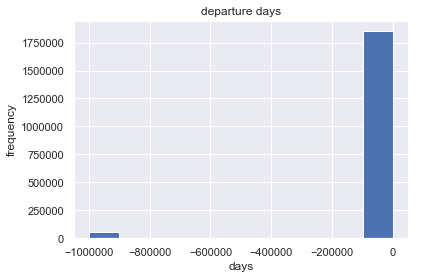

In [26]:
# min departure_days should be 0, the negative values are meaningless. 
# -1000000 value frequency is too small.
# Then it does not affect our analysis and I can ignore and also I don't need to use it for analysis.

# but if you want to use this data, you can do analysis with other columns and try to find a pattern by this means 
# you can update the correct value. For example, departure_days = -1000000 we can use 0 instead of -1000000.

# in addition to that, you can create insight based on user behavior. 
# thanks to behavior analysis, you can change with an ideal value

_=plt.hist(big_data.departure_days)
_=plt.title("departure days")
_=plt.xlabel("days")
_=plt.ylabel("frequency")
plt.show();

###### 2-Which search type has the lowest average displayed position? What is the best sorting order for this search type? Which search type should be excluded for a statistical reason?

In [27]:
# average displayed position according to search type
search_type = big_data[(big_data.displayed_position != -11)].groupby('search_type').agg({"displayed_position": "sum", 
                                                                                               "search_type": "count"})
search_type.columns = ['sum_displayed_position', 'count_search_type']
search_type["average_displayed_position"] = search_type.sum_displayed_position/search_type.count_search_type
search_type.sort_values(by=["average_displayed_position"])

logging.debug('calculate average displayed position according to search type')

,sum_displayed_position,count_search_type,average_displayed_position
search_type,,,
2116.0,846680.0,345472,2.45079
2100.0,5.0,2,2.50000
2114.0,820376.0,160949,5.09712
2113.0,5358643.0,854294,6.27260
2115.0,1209491.0,178804,6.76434
2111.0,1543650.0,211837,7.28697


###### What is the best sorting order for this search type?

In [28]:
# best sorting order according to this search type
sorting_order = big_data[(big_data.displayed_position != -11) & (big_data.search_type == 2116)].groupby('sort_order').agg({"sort_order": "count"})
sorting_order.columns = ['count_sort_order']
sorting_order.sort_values(by=["count_sort_order"], ascending=False)

logging.debug('calculate best sorting order according to this search type')

,count_sort_order
sort_order,
12.0,255829
312.0,58974
21.0,16391
212.0,6862
412.0,4574
41.0,1559
112.0,895
32.0,211
0.0,177


###### Which search type should be excluded for a statistical reason?

C:\Users\mmahm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


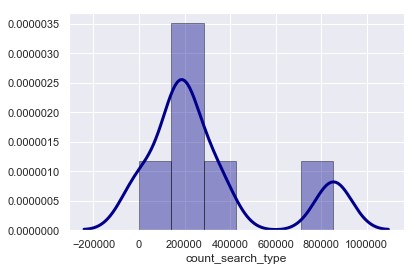

In [29]:
# Normally, we can decide to exclude search_id=2100. 
# Because the search is done for two times using this type by users. It is too small.
# But we have to demonstrate as statistically.
# I want to use a confidence interval for deciding the importance level.

# check current dataset distribution
_=sns.distplot(search_type.count_search_type, 
               hist=True, kde=True, color='darkblue', 
               hist_kws={'edgecolor':'black'}, 
               kde_kws={'linewidth': 3})



confidence interval for p=0.05 :  [115781.33333333 538375.33333333]

search_type_2100_frequency     :  2

search_type_2113_frequency     :  854294


search_type_2100 and search_type_2113 are out of confidence interval, because of their frequency

bigger frequency is the desired result, the opposite way smaller frequency is the undesired result

big frequency means that this search type is used by the user, otherwise small frequency is not


so we should exclude search_type_2100




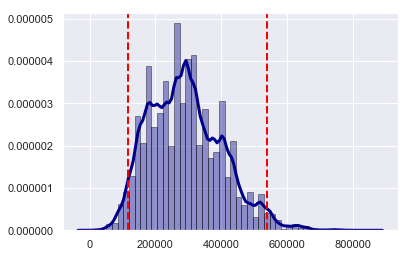

In [30]:
# I apply the central limit theorem to convert it to Gauss distribution 
# because now our dataset doesn't have a normal distribution.

bs_search  = np.array([])
for i in range(100000):
    bs_search  = np.append(bs_search, np.mean(np.random.choice(search_type.count_search_type, 
                                                                 replace=True, size=len(search_type))))

print("")
print("")
conf_int_search = np.percentile(bs_search, [2.5, 97.5])
print("confidence interval for p=0.05 : ",conf_int_search)
print("")
print("search_type_2100_frequency     : ",2)
print("")
print("search_type_2113_frequency     : ",854294)
print("")
print("")
print("search_type_2100 and search_type_2113 are out of confidence interval, because of their frequency")
print("")
print("bigger frequency is the desired result, the opposite way smaller frequency is the undesired result")
print("")
print("big frequency means that this search type is used by the user, otherwise small frequency is not")
print("")
print("")
print("so we should exclude search_type_2100")
print("")
print("")

# plot normal distributed dataset
_=sns.distplot(bs_search, 
               hist=True, kde=True, color='darkblue', 
               hist_kws={'edgecolor':'black'}, 
               kde_kws={'linewidth': 3})
_=plt.axvline(conf_int_search[0], color='red', linestyle='dashed', linewidth=2)
_=plt.axvline(conf_int_search[1], color='red', linestyle='dashed', linewidth=2)
plt.show()

###### 3-What are the top 10 “best” and “worst” performing items? Explain what metric you have chosen to evaluate the performance and why.

    -Best performed hotel is the most chosen hotel. This means that is many people have chosen it.
    -So, I think that the most important criteria are the number of clicks.
    -Contrary to best performance criteria, the worst performance hotel is the least chosen hotel. 

    -But we have many hotels one-clicked. Therefore, we should do extra analysis together with other columns.
    -For example, all columns values seem perfect but it still is one-clicked, so in this case, shows us this type of hotels is worst than the other one-clicked hotels. For this analysis, we should use "displayed_position" and "page number". In addition to that, we can use "search type" and "sort_order" values.

    -I calculated the coefficient for each column in order to measure hotel performance.

In [31]:
# the top 10 best and worst hotels

# calculate displayed_position coefficient
disp = pd.DataFrame(big_data[(big_data.displayed_position != -11)].groupby('displayed_position').agg({"displayed_position": "count"}))
disp.columns=["displayed_position_count"]
disp_coeff = disp["displayed_position_count"].sum()
disp["disp_coefficient"] = disp_coeff / disp["displayed_position_count"]
disp.index = disp.index + 1

# calculate page_num coefficient
page = pd.DataFrame(big_data[(big_data.displayed_position != -11)].groupby('page_num').agg({"page_num": "count"}))
page.columns=["page_num_count"]
page_coeff = page["page_num_count"].sum()
page["page_coefficient"] = page_coeff / page["page_num_count"]
page.index = page.index + 1

# calculate sort_order coefficient
sort = pd.DataFrame(big_data[(big_data.displayed_position != -11)].groupby('sort_order').agg({"sort_order": "count"}))
sort.columns=["sort_order_count"]
sort_coeff = sort["sort_order_count"].sum()
sort["sort_coefficient"] = sort["sort_order_count"] / sort_coeff
sort.index = sort.index + 1

# calculate search_type coefficient
search = pd.DataFrame(big_data[(big_data.displayed_position != -11)].groupby('search_type').agg({"search_type": "count"}))
search.columns=["search_type_count"]
search_coeff = search["search_type_count"].sum()
search["search_coefficient"] = search["search_type_count"] / search_coeff

clicked_hotel = big_data
clicked_hotel.drop(clicked_hotel[clicked_hotel['displayed_position'] == -11].index , inplace=True)

clicked_hotel[["displayed_position", "page_num", "sort_order"]] = pd.DataFrame(clicked_hotel[["displayed_position", 
                                                                                              "page_num","sort_order"]].add(1))

clicked_hotel = pd.merge(clicked_hotel, disp[["disp_coefficient"]], on="displayed_position", how="left")
clicked_hotel = pd.merge(clicked_hotel, page[["page_coefficient"]], on="page_num", how="left")
clicked_hotel = pd.merge(clicked_hotel, search[["search_coefficient"]], on="search_type", how="left")
clicked_hotel = pd.merge(clicked_hotel, sort[["sort_coefficient"]], on="sort_order", how="left")

clicked_hotel["performance_value"] = (clicked_hotel[("disp_coefficient")] * 
                                      clicked_hotel[("page_coefficient")] * 
                                      clicked_hotel[("search_coefficient")] * 
                                      clicked_hotel[("sort_coefficient")])

clicked_hotel = clicked_hotel.groupby('clicked_item_id').agg({"displayed_position": "sum",
                                                              "page_num": "sum",
                                                              "clicked_item_id": "count",
                                                              "performance_value": "sum",
                                                              "search_type": "sum",
                                                              "sort_order": "sum"})

total_performance = clicked_hotel.performance_value.sum()

clicked_hotel.columns = ["sum_displayed_position", "sum_page_num", "count_item", 
                         "performance", "sum_search_type", "sum_sort_order"]
clicked_hotel["average_page_number"] = clicked_hotel.sum_page_num/clicked_hotel.count_item
clicked_hotel["average_displayed_position"] = clicked_hotel.sum_displayed_position/clicked_hotel.count_item
clicked_hotel["average_search_type"] = clicked_hotel.sum_search_type/clicked_hotel.count_item
clicked_hotel["average_sort_order"] = clicked_hotel.sum_sort_order/clicked_hotel.count_item
clicked_hotel["performance"] = clicked_hotel.performance / total_performance

# the top 10 best hotels
print("")
print("")
print("**********************")
print("")
print("")
print("the top 10 best hotels")
clicked_hotel.sort_values(by=["performance"], ascending=False).head(10)

# the top 10 worst hotels
print("")
print("")
print("**********************")
print("")
print("")
print("the top 10 worst hotels")
clicked_hotel.sort_values(by=["performance"], ascending=True).head(10)

logging.debug('find the top 10 best and worst hotels')



**********************


the top 10 best hotels


,sum_displayed_position,sum_page_num,count_item,performance,sum_search_type,sum_sort_order,average_page_number,average_displayed_position,average_search_type,average_sort_order
clicked_item_id,,,,,,,,,,
148638.0,2647.0,540.0,257,0.03160,543119.0,38344.0,2.10117,10.29961,2113.30350,149.19844
6143296.0,40.0,31.0,5,0.00973,10565.0,265.0,6.20000,8.00000,2113.00000,53.00000
109891.0,1471.0,356.0,163,0.00341,344493.0,26525.0,2.18405,9.02454,2113.45399,162.73006
1208862.0,23.0,21.0,1,0.00230,2113.0,42.0,21.00000,23.00000,2113.00000,42.00000
5910514.0,74.0,59.0,6,0.00211,12684.0,787.0,9.83333,12.33333,2114.00000,131.16667
37570.0,38.0,25.0,2,0.00194,4228.0,355.0,12.50000,19.00000,2114.00000,177.50000
46574.0,5404.0,1180.0,739,0.00188,1562162.0,75802.0,1.59675,7.31258,2113.88633,102.57375
920435.0,288.0,96.0,28,0.00181,59194.0,5269.0,3.42857,10.28571,2114.07143,188.17857
2873172.0,858.0,247.0,90,0.00174,190280.0,15372.0,2.74444,9.53333,2114.22222,170.80000




**********************


the top 10 worst hotels


,sum_displayed_position,sum_page_num,count_item,performance,sum_search_type,sum_sort_order,average_page_number,average_displayed_position,average_search_type,average_sort_order
clicked_item_id,,,,,,,,,,
58463.0,4.0,1.0,1,6.48423e-14,2100.0,13.0,1.0,4.0,2100.0,13.0
91897.0,1.0,1.0,1,2.85854e-12,2114.0,1.0,1.0,1.0,2114.0,1.0
214921.0,1.0,1.0,1,2.85854e-12,2114.0,1.0,1.0,1.0,2114.0,1.0
910701.0,1.0,1.0,1,2.85854e-12,2114.0,1.0,1.0,1.0,2114.0,1.0
440391.0,1.0,1.0,1,3.17566e-12,2115.0,1.0,1.0,1.0,2115.0,1.0
1421657.0,1.0,1.0,1,3.76234e-12,2111.0,1.0,1.0,1.0,2111.0,1.0
4440412.0,1.0,1.0,1,3.76234e-12,2111.0,1.0,1.0,1.0,2111.0,1.0
104363.0,1.0,1.0,1,3.76234e-12,2111.0,1.0,1.0,1.0,2111.0,1.0
1961119.0,1.0,1.0,1,3.76234e-12,2111.0,1.0,1.0,1.0,2111.0,1.0


###### 4-Describe and visualise the relationship between the average displayed position and the CTR among the top 1000 most clicked items.

In [32]:
# step one-prepare dataframe for description and visualization relationship between avg_disp_pos and CTR

# most_clicked_hotels dataframe
most_clicked_hotels = big_data[(big_data.displayed_position != -11)].groupby('clicked_item_id').agg({"clicked_item_id":"count",
                                                                                                     "displayed_position": "sum"})
most_clicked_hotels.columns = ["count_clicked_items", "sum_displayed_position"]

most_clicked_hotels = (most_clicked_hotels.sort_values(by=["count_clicked_items"], ascending=False).
                       nlargest(columns=["count_clicked_items"], n=1000))

most_clicked_hotels["avg_displayed_position"] = (most_clicked_hotels.sum_displayed_position / 
                                                 most_clicked_hotels.count_clicked_items)

most_clicked_hotels.head(5)

# click through rates dataframe
ctr = impressed_item_ids_distr.to_frame()
ctr.columns = ["count_imp_item"]
ctr.index.names = ['imp_item_id']
ctr.head(5)

# join the dataframes
most_clicked_hotels = most_clicked_hotels.join(ctr, lsuffix='_x', rsuffix='_y')
most_clicked_hotels.head(5)

# calculate CTR
most_clicked_hotels["CTR"] = most_clicked_hotels.count_clicked_items / most_clicked_hotels.count_imp_item
most_clicked_hotels.head(5)

,count_clicked_items,sum_displayed_position,avg_displayed_position
clicked_item_id,,,
2834772.0,2650,3662.0,1.38189
1321090.0,2614,8609.0,3.29342
12624.0,2346,4715.0,2.00980
32940.0,2127,5925.0,2.78561
1455251.0,2092,2752.0,1.31549


,count_imp_item
imp_item_id,
1321090,40142
47121,29460
12594,21297
3218556,20701
880913,20554


,count_clicked_items,sum_displayed_position,avg_displayed_position,count_imp_item
clicked_item_id,,,,
2834772.0,2650,3662.0,1.38189,14885
1321090.0,2614,8609.0,3.29342,40142
12624.0,2346,4715.0,2.00980,18733
32940.0,2127,5925.0,2.78561,11883
1455251.0,2092,2752.0,1.31549,3455


,count_clicked_items,sum_displayed_position,avg_displayed_position,count_imp_item,CTR
clicked_item_id,,,,,
2834772.0,2650,3662.0,1.38189,14885,0.17803
1321090.0,2614,8609.0,3.29342,40142,0.06512
12624.0,2346,4715.0,2.00980,18733,0.12523
32940.0,2127,5925.0,2.78561,11883,0.17900
1455251.0,2092,2752.0,1.31549,3455,0.60550





*********************
correlation table


,avg_displayed_position,ctr
clicked_item_id,,
2834772.0,1.38189,0.17803
1321090.0,3.29342,0.06512
12624.0,2.00980,0.12523
32940.0,2.78561,0.17900
1455251.0,1.31549,0.60550





*********************
correlation coefficient


,avg_displayed_position,ctr
avg_displayed_position,1.00000,-0.45688
ctr,-0.45688,1.00000


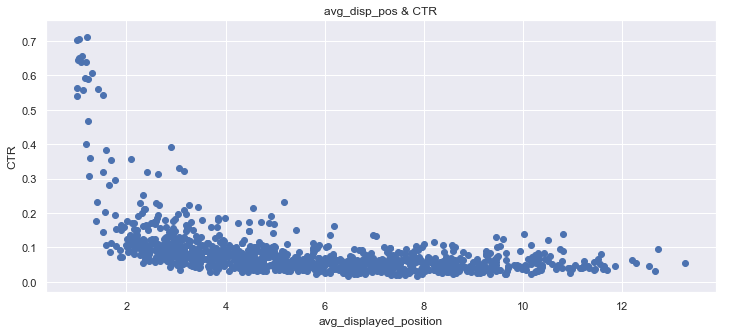

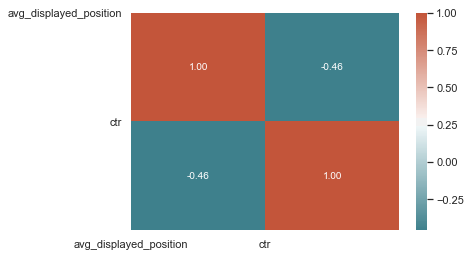

In [33]:
# step two-describe and visualise relationship between avg_disp_pos and CTR

# correlation coefficient
corr_ctr_disp = {'avg_displayed_position' : most_clicked_hotels.avg_displayed_position, 'ctr' : most_clicked_hotels.CTR}
corr_ctr_disp = pd.DataFrame(corr_ctr_disp)

pd.set_option('precision', 5)
corr_coeff = corr_ctr_disp.corr(method='pearson')

print('')
print('')
print('')
print('*********************')
print('correlation table')
corr_ctr_disp.head(5)

print('')
print('')
print('')
print('*********************')
print('correlation coefficient')
corr_coeff

print('')
print('')
print('')
fig = plt.figure(figsize=(12,5))
_=plt.scatter(corr_ctr_disp.avg_displayed_position, corr_ctr_disp.ctr)
_=plt.xlabel('avg_displayed_position')
_=plt.ylabel('CTR')
_=plt.title('avg_disp_pos & CTR')
plt.show();

print('')
print('')
print('')
colormap = sns.diverging_palette(210, 20, as_cmap=True)
_=sns.heatmap(corr_coeff, cmap=colormap, annot=True, fmt=".2f")
_=plt.xticks(range(len(corr_coeff.columns)), corr_coeff.columns)
_=plt.yticks(range(len(corr_coeff.columns)), corr_coeff.columns)
plt.show();

logging.debug('correlation')